In [1]:
import numpy as np
import sympy as sp
from matplotlib import pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn; seaborn.set()
%matplotlib inline
from math import cos, sin

In [2]:
x, t = sp.symbols('x t')

In [3]:
p = t**2 / 2
q = .5 + .5 * t**2 + t
s = .5 * x**2
f = sin(14) + t + cos(14) * x + 1

In [4]:
def p_vect(t):
    return p.subs('t', t)
p_vect = np.vectorize(p_vect)

def q_vect(t):
    return q.subs('t', t)
q_vect = np.vectorize(q_vect)

def s_vect(x):
    return s.subs('x', x)
s_vect = np.vectorize(s_vect)

def f_vect(x, t):
    return f.subs({'x':x, 't':t})
f_vect = np.vectorize(f_vect)

In [5]:
N = 4
M = 4
tau = 1/M
h = 1/N

In [6]:
grid = np.zeros((N+1, M+1))

In [7]:
grid[N,:] = s_vect(np.arange(0, N+1) * h)
grid[0:-1,0] = p_vect(tau * (M - np.arange(0, M)))
grid[0:-1,M] = p_vect(tau * (M - np.arange(0, M)))

In [8]:
for i in range(1, N):
    for j in range(1, M):
        grid[i, j] = tau / h**2 * grid[j-1, i-1] \
                       + (1 - 2*tau / h**2) * grid[j-1, i] \
                       + tau / h**2 * grid[j-1, i+1] \
                       + tau * f_vect(j, i-1)

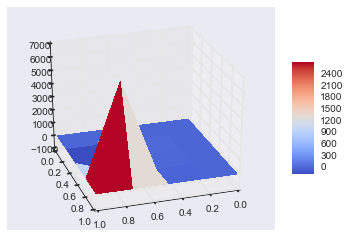

In [33]:
from IPython.html.widgets import interact

@interact
def plot(elev=28, azim=72):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    XXX = np.arange(0, 1+h, h, dtype = float)
    YYY = np.arange(0, 1+tau, tau, dtype = float)
    XXX, YYY = np.meshgrid(XXX, YYY)
    surf = ax.plot_surface(XXX, YYY, grid, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    t = fig.colorbar(surf, shrink=0.5, aspect=5)
    ax.view_init(elev, azim)
    plt.show()